In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [130]:
# Cargar el data Frame y vemos datos
df = pd.read_csv("/Users/francoquintanilla/Documents/Jupyter/CSV/regmulti_peso.csv")
df.head()

,dia,peso,calorias,distancia,dia_s
0,1,85.20,-502,6.14,Sabado
1,2,85.20,-585,7.22,Domingo
2,3,85.70,-583,6.60,Lunes
3,4,85.90,-471,5.85,Martes
4,5,85.15,-378,4.55,Miercoles


In [131]:
# Data Frame para agregar nuevos datos 
df1 = pd.DataFrame({"dia":[95],
                    "peso":[76.5],
                    "calorias":[0],
                    "distancia":[0],
                    "dia_s":["Martes"]})
# "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo", "Lunes"

In [132]:
# Hacemos las calorias negativas
df1["calorias"] = df1["calorias"]*-1

In [133]:
# Concatenamos nuestros dfs
# df = pd.concat([df, df1], ignore_index=True)

In [134]:
# Archivo en un CSV cuando ya los datos que meto aquí en python sean grandes
# df.to_csv('/Users/francoquintanilla/Documents/Jupyter/CSV/regmulti_peso1.csv', index=False)

In [135]:
# Checamos primeros datos
df.head()

,dia,peso,calorias,distancia,dia_s
0,1,85.20,-502,6.14,Sabado
1,2,85.20,-585,7.22,Domingo
2,3,85.70,-583,6.60,Lunes
3,4,85.90,-471,5.85,Martes
4,5,85.15,-378,4.55,Miercoles


In [136]:
# Ultimos datos
df.tail()

,dia,peso,calorias,distancia,dia_s
89,90,75.65,-196,3.35,Jueves
90,91,75.90,-242,3.83,Viernes
91,92,76.00,-290,3.83,Sabado
92,93,76.15,-162,2.75,Domingo
93,94,76.30,-100,1.57,Lunes


In [137]:
# Tamaño de los datos
df.shape

(94, 5)

In [138]:
# Tipo de datos
df.dtypes

dia            int64
peso         float64
calorias       int64
distancia    float64
dia_s         object
dtype: object

In [139]:
# Limpiar mi data frame de los outliers (cuando corrí 10 km) osea solo upper
Q1 = np.percentile(df['distancia'], 25)
Q3 = np.percentile(df['distancia'], 75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR

In [140]:
# DataFrame nuevo sin outliers
df = df[df['distancia'] < upper]

In [141]:
# Caracteristicas estadisticas de los datos
df.describe()

,dia,peso,calorias,distancia
count,93.000000,93.000000,93.000000,93.000000
mean,47.892473,79.918763,-299.387097,4.457312
std,27.159137,2.702800,148.838257,1.888966
min,1.000000,75.650000,-639.000000,0.520000
25%,25.000000,77.800000,-404.000000,3.150000
50%,48.000000,79.630000,-290.000000,4.550000
75%,71.000000,81.850000,-190.000000,5.820000
max,94.000000,85.900000,-32.000000,8.330000


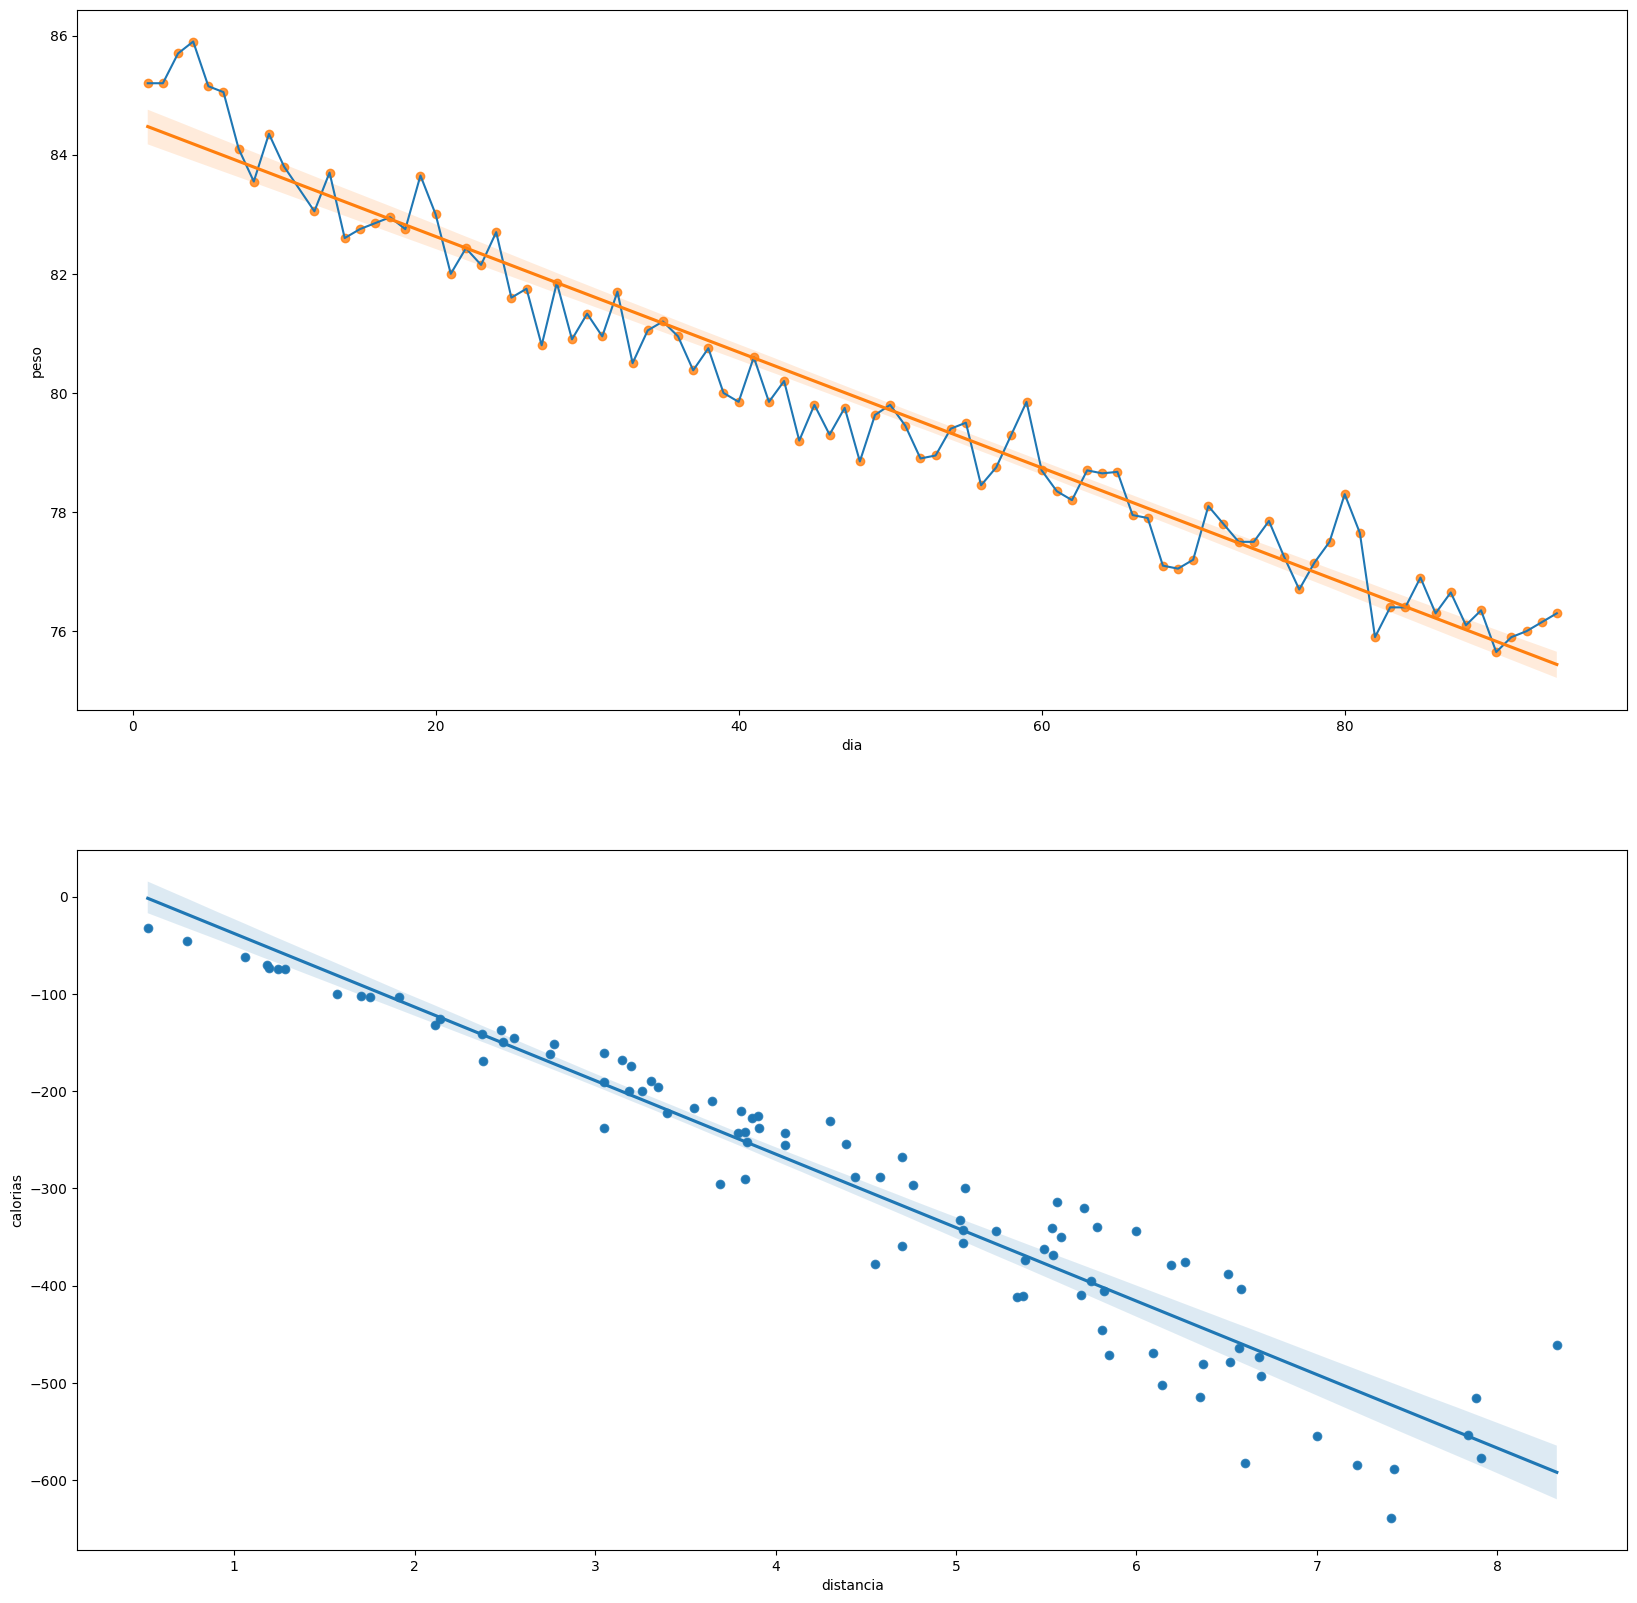

In [142]:
# Plot del peso vs los días transcurridos
fig, axes = plt.subplots(2, 1, figsize=(20,20))
sns.lineplot(x="dia", y="peso", data=df, ax=axes[0])
sns.regplot(x="dia", y="peso", data=df, ax=axes[0])
sns.scatterplot(y="calorias", x="distancia", data=df, ax=axes[1])
sns.regplot(y="calorias", x="distancia", data=df, ax=axes[1])
plt.show()

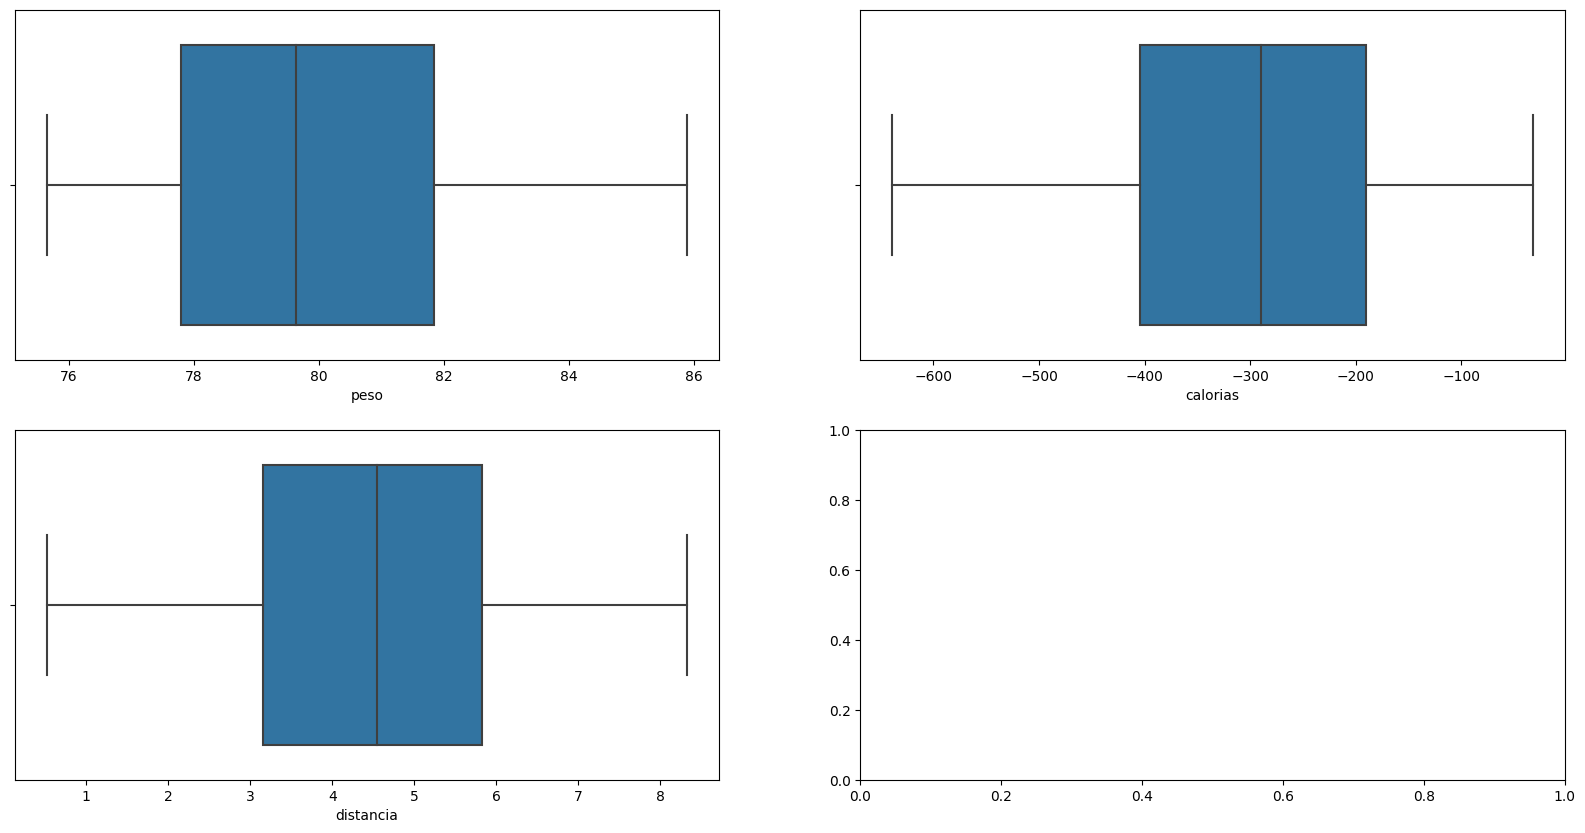

In [143]:
# Comportamiento de los quartiles de los datos
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.boxplot(x="peso", data=df, ax=axes[0, 0])
sns.boxplot(x="calorias", data=df, ax=axes[0, 1])
sns.boxplot(x="distancia", data=df, ax=axes[1, 0])
plt.show()

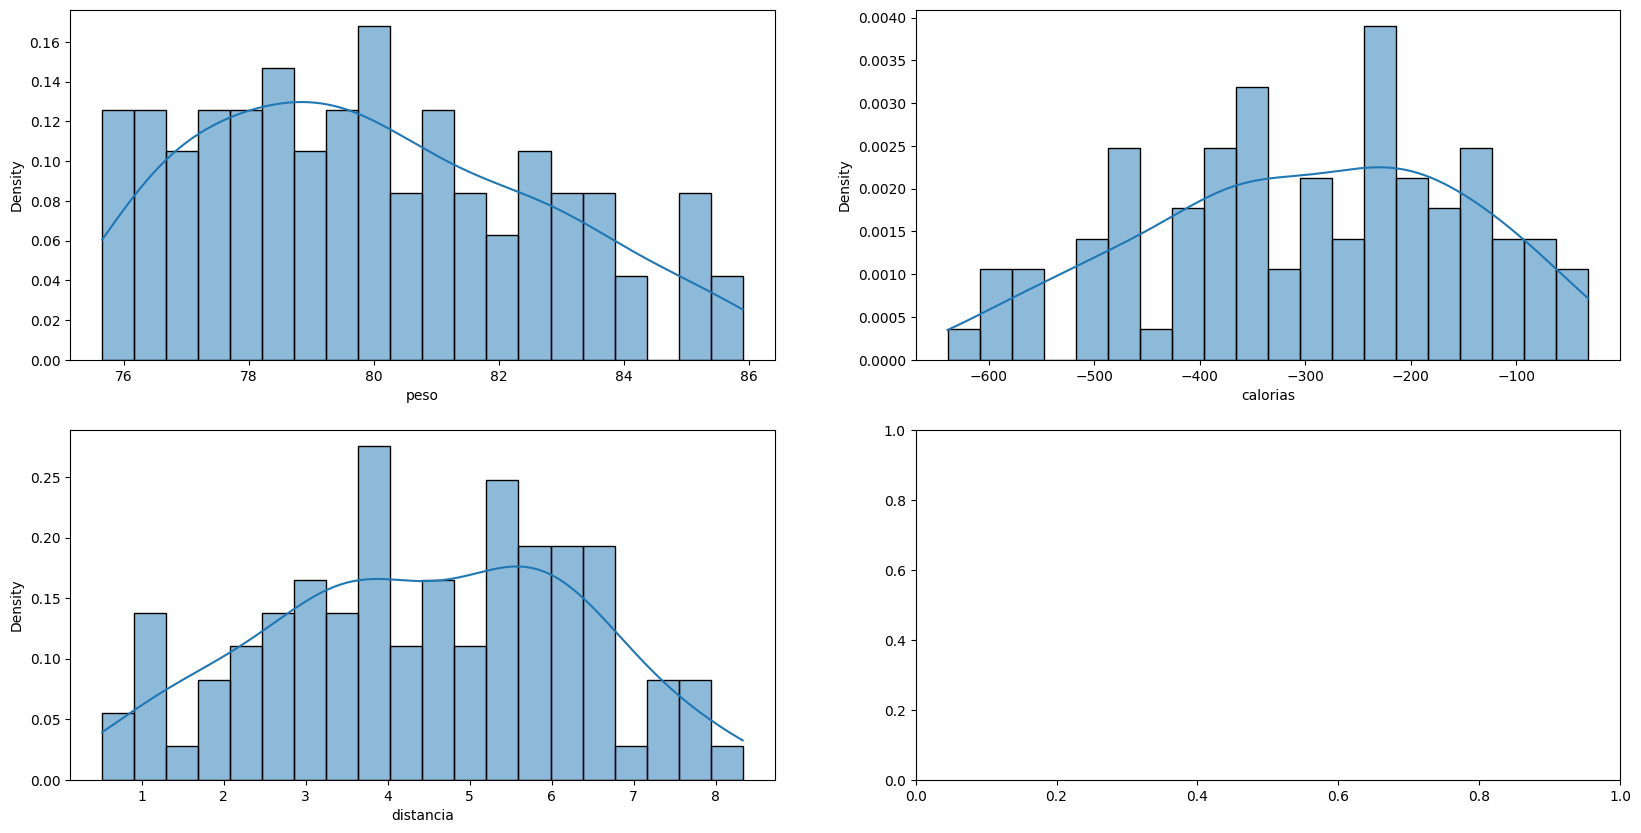

In [144]:
# Histograma del comportamiento del peso
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.histplot(x="peso", data=df, bins=20, kde=True, stat="density", ax=axes[0, 0])
sns.histplot(x="calorias", data=df, bins=20, kde=True, stat="density", ax=axes[0, 1])
sns.histplot(x="distancia", data=df, bins=20, kde=True, stat="density", ax=axes[1, 0])
plt.show()

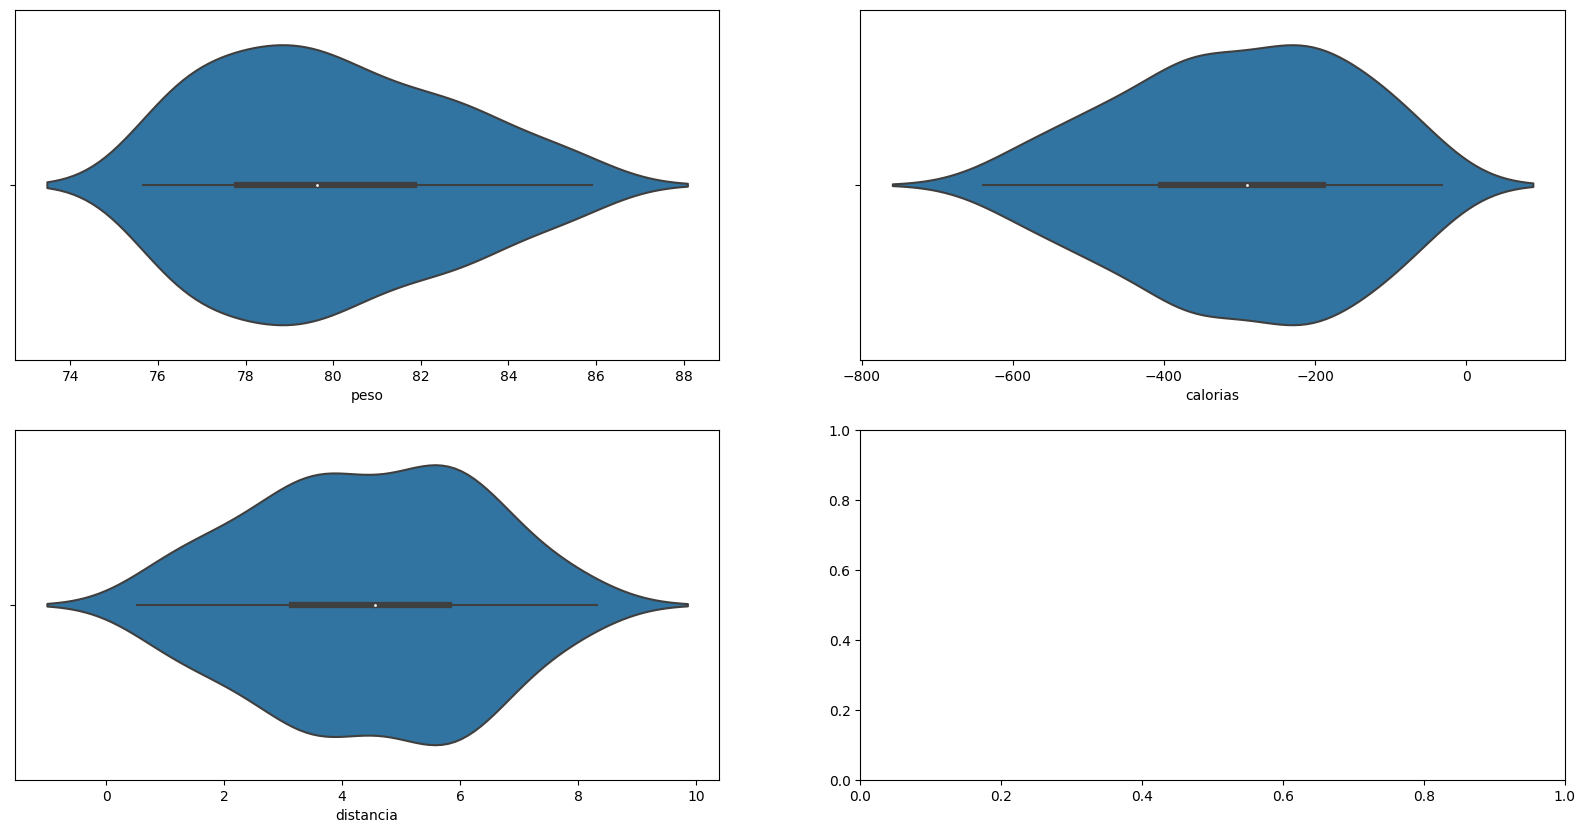

In [145]:
# Comportamiento de los quartiles de los datos con violinplot (hist con box)
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.violinplot(x="peso", data=df, ax=axes[0, 0])
sns.violinplot(x="calorias", data=df, ax=axes[0, 1])
sns.violinplot(x="distancia", data=df, ax=axes[1, 0])
plt.show()

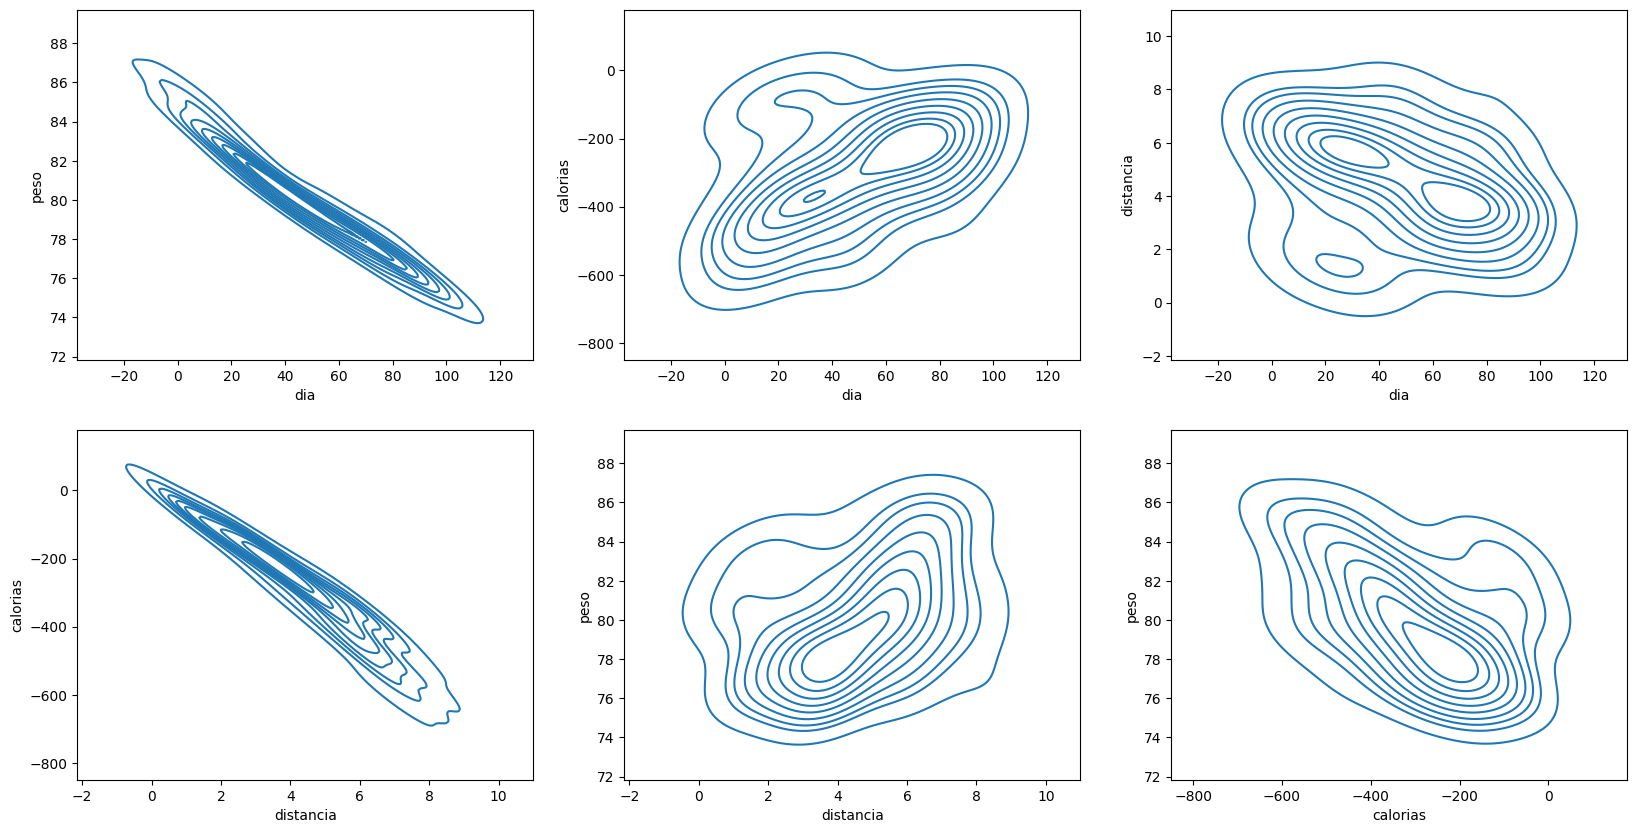

In [146]:
# Countour plot
fig, axes = plt.subplots(2,3, figsize=(20,10))
sns.kdeplot(x="dia", y="peso", data=df, ax=axes[0, 0])
sns.kdeplot(x="dia", y="calorias", data=df, ax=axes[0, 1])
sns.kdeplot(x="dia", y="distancia", data=df, ax=axes[0, 2])
sns.kdeplot(x="distancia", y="calorias", data=df, ax=axes[1, 0])
sns.kdeplot(x="distancia", y="peso", data=df, ax=axes[1, 1])
sns.kdeplot(x="calorias", y="peso", data=df, ax=axes[1, 2])
plt.show()

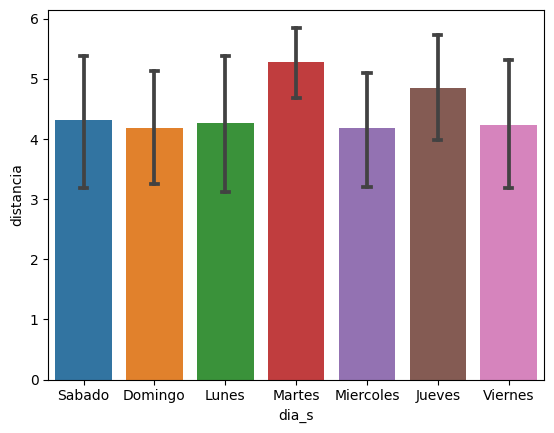

In [147]:
# Plot de la distancia en los días de la semana
sns.barplot(x="dia_s", y="distancia", data=df, capsize=0.1)
plt.show()

In [148]:
# Veré que día corrí la distancia maxima
df[df["distancia"] == df["distancia"].max()]

,dia,peso,calorias,distancia,dia_s
86,87,76.65,-461,8.33,Lunes


In [149]:
# Encontrar la media del día con mayor actividad (martes)
round(df[df["dia_s"] == "Martes"]["distancia"].mean(), 4)

5.2858

In [150]:
# Encontrar la desvicación estandar de ese día
round(df[df["dia_s"] == "Martes"]["distancia"].std(), 4)

1.0701

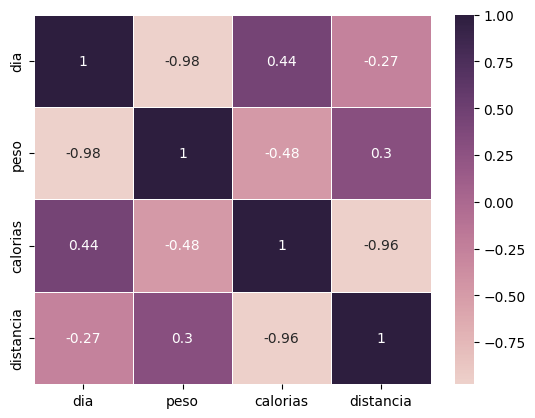

In [151]:
# Hacemos la matriz de correlación
sns.heatmap(df.corr(numeric_only=True), cmap=sns.cubehelix_palette(as_cmap=True),
            annot=True, linewidth=0.5)
plt.show()

Regresión Lineal

In [152]:
# Definimos variables del modelo con nuesta data
seed = 1800
testp = 0.25

# Nuestra variable objetivo, es decir, lo que buscamos
obj = df['peso']

# Eliminamos la variable objetivo como la categorica (no nos sirve regresión lineal)
train_df = df.drop(['peso', 'dia_s'], axis=1)

# Dividimos nuestro modelo con el data de entrenamiento con difrentes variables
X, X_test, y, y_test = \
train_test_split(train_df, obj, test_size=testp, random_state=seed)

In [153]:
# Iniciamos el modelo de regresion lineal con nuestros datos
model = LinearRegression().fit(X, y)

# Hacemos predicciones del modelo
pred = model.predict(X_test)

In [154]:
# Sacamos el accuracy del modelo
print("Accuracy Score:", round(model.score(X_test, y_test)*100, 4), "%")

Accuracy Score: 97.0653 %


In [165]:
# Checamos el error
mse = mean_squared_error(y_test, pred, squared=True)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f'Mean squared error: {mse:.4f}')
print(f'Root mean squared error: {rmse:.4f}')

Mean squared error: 0.2430
Root mean squared error: 0.4929


In [156]:
# Los coeficientes de la ecuación de regresión son:
print("b =", round(model.intercept_, 4))
print("m =", model.coef_)

b = 84.1415
m = [-0.09129043 -0.0034894  -0.20257702]


In [157]:
# Checamos los datos predichos vs los acutales en el test
df_preds = pd.DataFrame({'Real': y_test.squeeze(), 'Predicted': pred.squeeze()})
df_preds = df_preds.sort_index()
print(df_preds)

     Real  Predicted
1   85.20  84.537634
2   85.70  84.564963
7   83.55  83.444364
12  83.70  83.301052
14  82.75  83.057520
16  82.95  82.802204
21  82.43  82.421284
36  80.38  80.869283
37  80.75  80.678638
38  80.00  80.732211
40  80.60  80.563928
48  79.63  79.769726
51  78.90  79.383814
54  79.50  79.144356
55  78.45  79.109417
58  79.85  78.825023
60  78.35  78.542059
67  77.10  77.868745
72  77.50  77.488933
78  77.50  76.877682
83  76.40  76.478027
88  76.35  76.086036
89  75.65  75.930675
90  75.90  75.902660


In [158]:
# Checamos los feature names para saber que poner de info
coefficients_df = pd.DataFrame(data=model.coef_, 
                              index=X.columns, 
                              columns=['Coefficient value'])
print(coefficients_df)

           Coefficient value
dia                -0.091290
calorias           -0.003489
distancia          -0.202577


In [167]:
# Por si queremos checar la predicción algún día en especifico
day = pd.DataFrame({'dia':100, 'calorias':0, 'distancia':0}, index=[0])
print(model.predict(day).squeeze())

75.01248218663206


In [160]:
# Función que nos ayuda a agregar la media de los datos faltantes (en orden)
# df['peso'] = round(df["peso"].ffill().add(df["peso"].bfill()).div(2), 2)